In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from BurstSim.GRB import *
from BurstSim.Detector import *
from BurstSim.Spacecraft import *
from BurstSim.Stats import calcNorms, addErrors, calcNormsWithError

In [3]:
#Evenly spaced around azimuth
#Staggered in zenith
#Arbitrary type
pointings = {'01': ('90:0:0','5:0:0'),
            '02': ('180:0:0','10:0:0'),
            '03': ('270:0:0','15:0:0'),
            '04': ('360:0:0','20:0:0')}

In [4]:
spacecraft = Spacecraft(pointings)

In [5]:
for det in spacecraft.detectors:
    det.noise = False
    det.window = 0.1

In [6]:
rr,dd = np.meshgrid(np.linspace(0,360,55,endpoint=False),np.linspace(-90,90,55))
training_positions = np.vstack([rr.ravel(),dd.ravel()])

In [7]:
exposures = np.array([[detector.exposure(position[0],position[1]) for position in training_positions.T] 
                      for detector in spacecraft.detectors])

In [8]:
training_grbs = [GRB(position[0],position[1],binz=0.01) for position in training_positions.T[exposures.sum(axis=0) > 0.]]

In [9]:
training_grbs[345].loc

(117.81818181818183, -6.6666666666666572)

In [10]:
spacecraft.throw_grb(training_grbs[345])

[{'T0': -10.01,
  'counts': -1,
  'counts_err': -1,
  'dec': -0.11635528346628864,
  'name': '01',
  'ra': 2.056315217884974},
 {'T0': 0.0,
  'counts': 956.26198454095527,
  'counts_err': 31,
  'dec': -0.11635528346628864,
  'name': '02',
  'ra': 2.056315217884974},
 {'T0': 0.0,
  'counts': 3940.9335475136968,
  'counts_err': 63,
  'dec': -0.11635528346628864,
  'name': '03',
  'ra': 2.056315217884974},
 {'T0': -10.01,
  'counts': -1,
  'counts_err': -1,
  'dec': -0.11635528346628864,
  'name': '04',
  'ra': 2.056315217884974}]

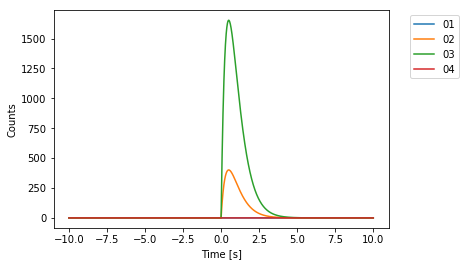

In [11]:
for detector in spacecraft.detectors:
    if np.sum(detector.response) > 0.:
        plt.plot(detector.t,detector.response,label=detector.name)
plt.xlabel('Time [s]')
plt.ylabel('Counts')
#plt.xlim((-5,-1))
#plt.ylim((0,20))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

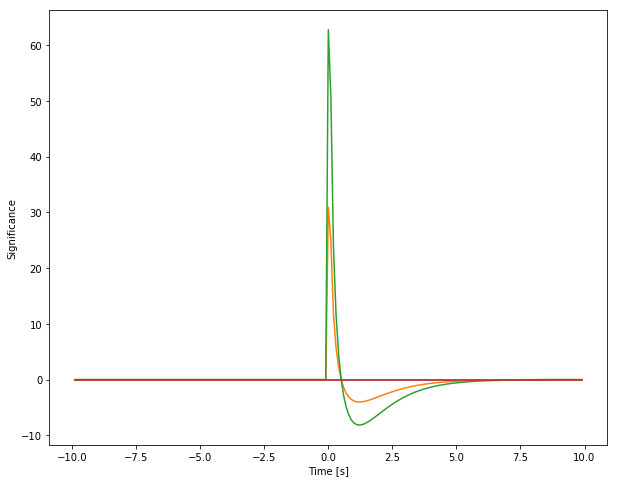

In [12]:
plt.figure(figsize=(10,8))
for detector in spacecraft.detectors:
    plt.plot(detector.sign_time,detector.significance,label=detector.name)
plt.xlabel('Time [s]')
plt.ylabel('Significance')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.savefig('GRB Significance.pdf', transparent = True)
plt.show()

In [13]:
real_grb = GRB(training_grbs[345].loc[0],training_grbs[345].loc[1],binz=0.01,
               real=True,filename='Short_GRB_Files/glg_tte_n3_bn120323507_10s.fit')

FileNotFoundError: [Errno 2] No such file or directory: 'Short_GRB_Files/glg_tte_n3_bn120323507_10s.fit'

In [13]:
spacecraft.throw_grb(real_grb)

[{'T0': -0.099999999999999645,
  'counts': 44.314559223516568,
  'counts_err': 7,
  'dec': -0.11635528346628864,
  'name': '02',
  'ra': 2.056315217884974},
 {'T0': -0.099999999999999645,
  'counts': 182.2923124713563,
  'counts_err': 14,
  'dec': -0.11635528346628864,
  'name': '03',
  'ra': 2.056315217884974},
 {'T0': -10.01,
  'counts': -1,
  'counts_err': -1,
  'dec': -0.11635528346628864,
  'name': '01',
  'ra': 2.056315217884974},
 {'T0': -10.01,
  'counts': -1,
  'counts_err': -1,
  'dec': -0.11635528346628864,
  'name': '04',
  'ra': 2.056315217884974}]

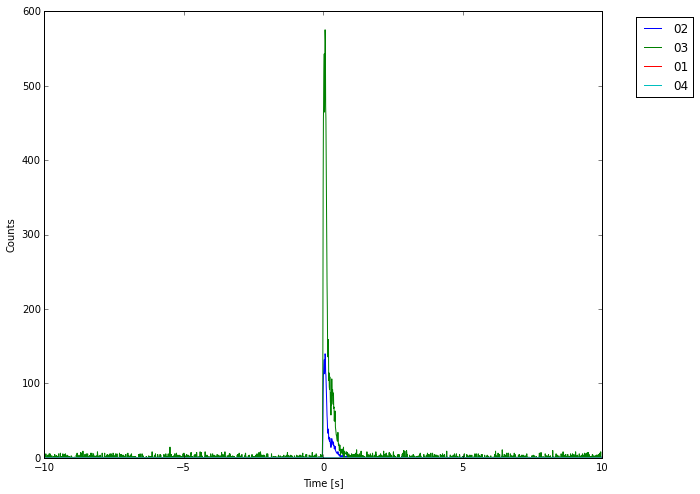

In [15]:
plt.figure(figsize=(10,8))
for detector in spacecraft.detectors:
    if np.sum(detector.response) > 0.:
        plt.plot(detector.t,detector.response,label=detector.name)
plt.xlabel('Time [s]')
plt.ylabel('Counts')
#plt.xlim((-5,-1))
#plt.ylim((0,20))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

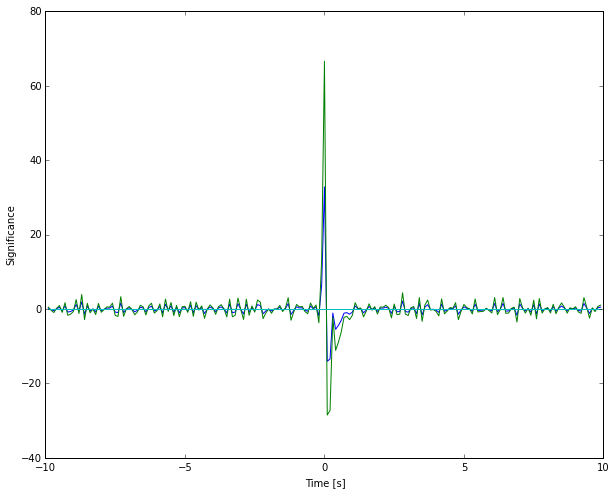

In [16]:
plt.figure(figsize=(10,8))
for detector in spacecraft.detectors:
    plt.plot(detector.sign_time,detector.significance,label=detector.name)
plt.xlabel('Time [s]')
plt.ylabel('Significance')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.savefig('GRB Significance.pdf', transparent = True)
plt.show()

In [17]:
for det in spacecraft.detectors:
    det.noise = False
    det.window = 1.0

In [18]:
real_grb2 = GRB(training_grbs[345].loc[0],training_grbs[345].loc[1],binz=0.01,
               real=True,filename='Short_GRB_Files/glg_tte_n0_bn120210650_10s.fit')

In [19]:
spacecraft.throw_grb(real_grb2)

[{'T0': 0.0,
  'counts': 150.55993820367422,
  'counts_err': 12,
  'dec': -0.11635528346628864,
  'name': '02',
  'ra': 2.056315217884974},
 {'T0': 0.0,
  'counts': 619.59180776760934,
  'counts_err': 25,
  'dec': -0.11635528346628864,
  'name': '03',
  'ra': 2.056315217884974},
 {'T0': -10.01,
  'counts': -1,
  'counts_err': -1,
  'dec': -0.11635528346628864,
  'name': '01',
  'ra': 2.056315217884974},
 {'T0': -10.01,
  'counts': -1,
  'counts_err': -1,
  'dec': -0.11635528346628864,
  'name': '04',
  'ra': 2.056315217884974}]

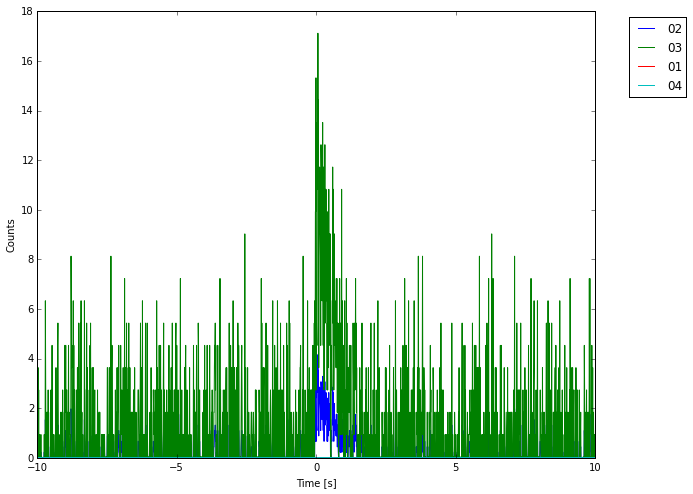

In [21]:
plt.figure(figsize=(10,8))
for detector in spacecraft.detectors:
    if np.sum(detector.response) > 0.:
        plt.plot(detector.t,detector.response,label=detector.name)
plt.xlabel('Time [s]')
plt.ylabel('Counts')
#plt.xlim((-5,-1))
#plt.ylim((0,20))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

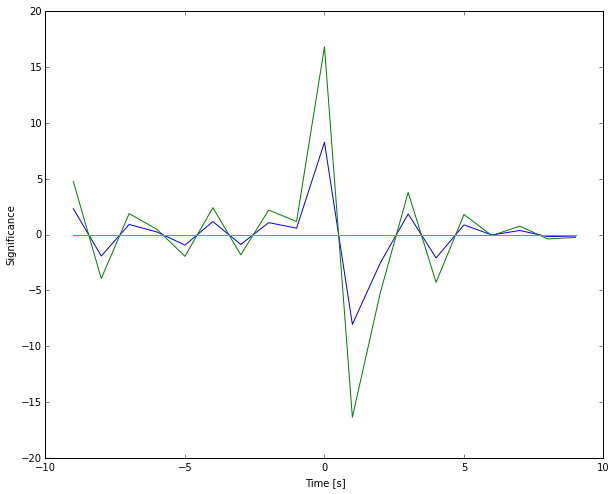

In [22]:
plt.figure(figsize=(10,8))
for detector in spacecraft.detectors:
    plt.plot(detector.sign_time,detector.significance,label=detector.name)
plt.xlabel('Time [s]')
plt.ylabel('Significance')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.savefig('GRB Significance.pdf', transparent = True)
plt.show()